# 04 Matplotlib Top Graphiques

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## 1.Graphique de Classification avec Scatter() 
pas de POO ici

In [ ]:
from sklearn.datasets import load_iris
# voir lien https://www.kaggle.com/code/kostasmar/exploring-the-iris-data-set-scikit-learn

In [ ]:
iris = load_iris()  # -> dans load_iris il y a 2 tableaux, 1 data et 1 target mais load_iris introuvable dans le dossier datasets !
x = iris.data     # 150 données de 4 variables (long et larg sepal + long et larg petal)
y = iris.target   # 150 données de 3 CLASSES de fleurs d'iris -> noms 0, 1 et 2 pour l'analyse
# print(x) # pour les voir idem pour y

# print(iris, '\n')  # pour voir le fichier load_iris


In [ ]:
x.ndim

#x
#y
#y.shape
#x[0:1, :]  # 1ere ligne, toute cols
#iris.keys()

In [ ]:
print(f'x contient {x.shape[0]} exemples et {x.shape[1]} variables pour les X data (long,larg)sepal + (long,larg)petal')
print(f'il y a {np.unique(y).size} classes pour Y target  0, 1, 2 pour les 3 types de fleurs')

print('x.size=', x.size)
print('x.shape=', x.shape)
print('x.ndim=', x.ndim)
print(x[0:6, :])          # on affiche  x sur les 6 1eres lignes et toutes les colonnes

print('y.size=', y.size)
print('y.shape=', y.shape)
print('y.ndim=', y.ndim)
print(y[0:y.size])    # on affiche y

noms_var_x = ["Sepal length", "Sepal width", "Petal length", "Petal wigth"]  # je m'amuse à nommer pour afficher ensuite
noms_var_y = {"Setosa":0, "Versicolor":1, "Virginica":2}

### 1ers test de visualisation

In [ ]:
# nuage de point sur les 2 1eres classes de fleurs
# plt.scatter(x[:,0], x[:,1])  # toutes les lignes sur la colonne 0 et la colonne 1 => manque couleurs sur chaque classe
plt.scatter(x[:,0], x[:,1], c=y) # avec couleurs c selon la variable y
plt.xlabel("longueur sépal")
plt.ylabel("largeur sépal")

In [ ]:
n = x.shape[1]  # n = 4 = nombre de colonnes de la variable x = shape[1], nbre ligne = shape[0]
plt.figure(figsize=(12, 8)) # on définit une taille de figure en inches
for i in range(n):  # boucle sur le nombre de colonnes
    plt.subplot(n//2, n//2, i+1) # n//2=2 lignes et n//2=2 colonnes, graphique i+1 car commence à 0
    plt.scatter(x[:, 0], x[:, i], alpha=0.5,s=x[:, 2]*100, c=y) # création graphique scatter(x, y, couleurPts selon Ytarget)
    # avec toutes lignes et 1er colonne pour x, toutes lignes et colonne i pour y, couleur c=y couleur selon les classes y
    # s=s surface des point en fonction de la colonne 3 = x[:2] (pas très utile ici ) et transparence de 0,5 des points
    plt.xlabel(noms_var_x[0]) # on rajoute les noms des axes pour x et y
    plt.ylabel(noms_var_x[i])
    plt.colorbar(ticks=list(np.unique(y)))  # TICKS= échelle où y apparait 1 seule fois (np.unique(y))
    ### ON UTILISERA SEABORN POUR METTRE DES LEGENDES - voir autre video

# analyse de la transparence des points

In [ ]:
#  x[x[:, 0].argsort()]  # tri par ordre selon la 1ere colonne d'index 0
#  sur le 2sd graph, on voit un point (5.1 , 3.8) très foncé car en fait il y a 2 points identiques

## 2 variables de X sur le meme histogramme - mode automatique

In [ ]:
plt.hist(x[:, 0], facecolor='b')  # on prend la 1ere colonne - facecolor = green = g 
plt.hist(x[:, 1])    # et la 2sd colonne couleur automatique
# l'axe x est la longueur (en green) ou largeur (en orange) du sépal
# l'axe y est LE NOMBRE D APPARITION de chaque barre (bins) = 10 par défaut  = 10 artists

## 2 variables de X sur le meme histogramme - mode choix des barres bins

In [ ]:
plt.hist(x[:, 0], bins=40, facecolor='g')  # on prend la 1ere colonne - facecolor = green = g , et 40 barres
plt.hist(x[:, 1], bins=20)    # et la 2sd colonne avec 20 barres = bins
# l'axe x est la longueur (en green) ou largeur (en orange) du sépal
# l'axe y est LE NOMBRE D APPARITION de chaque barre ( bins )
# si on met bins = 0 cela donne 1 seule barre à 150 de hauteur car 150 éléments

## 2. Graphiques 3D  - en POO

### %matplotlib à écrire que sur JupyterLab avant l'import de Axes3D -> affiche les graph en backend (en dehors de jupiter) pour rotation,zoom etc...( sur spider ou pycharm inutile, le graph 3D affiché se module tout seul

In [ ]:
%matplotlib widget 
# pip install ipympl
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
ax = plt.axes(projection='3d')  # création d'un OBJET ax = axe 3D sur lequel on va travailler
ax.scatter(x[:, 0], x[:, 1], x[:,2], c=y) # création figure scatter(x, y, z, couleurPts selon ytarget) => 3 variables ici x, y, z

In [ ]:
f = lambda x, y: np.sin(x) + np.cos(x+y)  # on créé une fonction avec le générateur de fonction anonyme lambda

X = np.linspace(0, 7, 50)  # on crée une ligne de 0 à 7 de 50 Pts nommée X
Y = np.linspace(0, 5, 50)
X, Y = np.meshgrid(X, Y)  # construit une grille à partir de 2 axes X et Y
Z = f(X, Y)   # on créé Z en injectant X et Y dans la fonction f
print(Z.shape)  # matrice(50, 50)
ax = plt.axes(projection='3d')  # pour visualiser on crée un objet axe3D
ax.plot_surface(X, Y, Z, cmap='plasma')  # on affiche une surface(x, y, z, couleurmap)
plt.show()


## 3. Histogrammes

In [ ]:
x = np.random.randn(1000)

plt.figure(figsize=(12, 3))
plt.subplot(121)   # subplot(121) = subplot(1, 2, 1) pour 1 ligne, 2 colonne, graphe 1
plt.hist(x, bins=10)
plt.title('bins=10')  # bins = nombre de sections rectangles (par défaut bins = 10 )
# fin du 1er graph
plt.subplot(122)
plt.hist(x, bins=50)
plt.title('bins= 50')
# findu 2sd graph avec 50 sections rectangles

## Histogramme 2D de corrélation de 2 var x et une colorbar

In [ ]:
x = iris.data

plt.hist2d(x[:,0], x[:,1], cmap='Blues')  # var1=1er colonne, var2 = 2sd colonne, couleurmap = blue
plt.xlabel('longueur sépal')
plt.ylabel('largeur sépal')
plt.colorbar()  # ajout d'une colorbar surle coté pour voir la correspondance des couleurs du graph
# ici 10 fleurs ont un sepla (6.5-6.75, 3.0-3.25) par exemple ( le + foncé )

C:\Users\user\AppData\Local\Temp\ipykernel_29680\3872437345.py:4: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face = misc.face(gray=True)  # on l'enregistre dans un tableau numpy face en noir&blanc=256 color


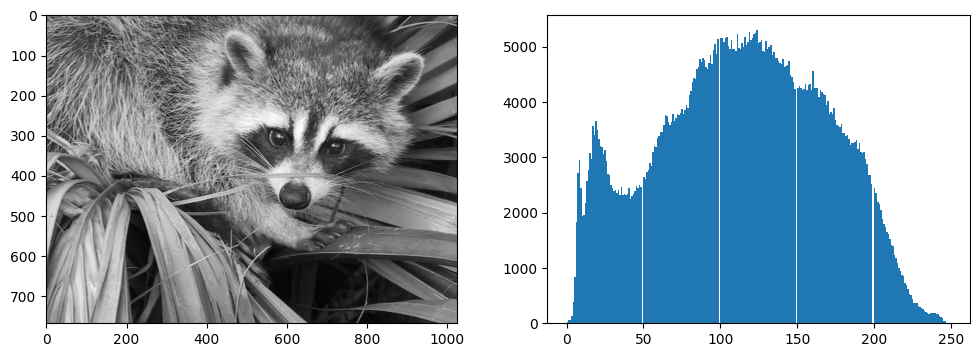

In [2]:
import matplotlib.pyplot as plt
# histogramme d'une image
from scipy import misc  # on importe l'image depuis scipy
face = misc.face(gray=True)  # on l'enregistre dans un tableau numpy face en noir&blanc=256 color

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.imshow(face, cmap='gray')
plt.subplot(122)
# trouver combien de pixels varient du noir au blanc
plt.hist(face.ravel(), bins=255)  # Histogramme d'analyse de l'image avec bins=255, aplatie avec ravel (0 = noir et 255 = blanc)
plt.show()

In [3]:
face.shape

(768, 1024)

## 4. Graphiques ContourPlot() 

### pour voir graph dim 3 en vue du dessus pour voir les min et max tres utiles en IA
cela sert à voir les min et max de fonctions 3D vues en 2D

<function matplotlib.pyplot.show(close=None, block=None)>

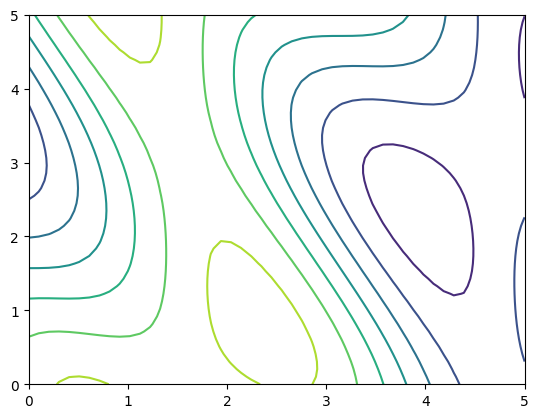

In [5]:
import numpy as np
%matplotlib inline
f = lambda x, y: np.sin(x) + np.cos(x+y)*np.cos(x)

X = np.linspace(0, 5, 50)
Y = np.linspace(0, 5, 50)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)  # on a créé notre fonction 3D

plt.contour(X, Y, Z)  # on visualise sa contourPlot toute simple en vue du dessus (meme graph que 3D vu précédement)
plt.show

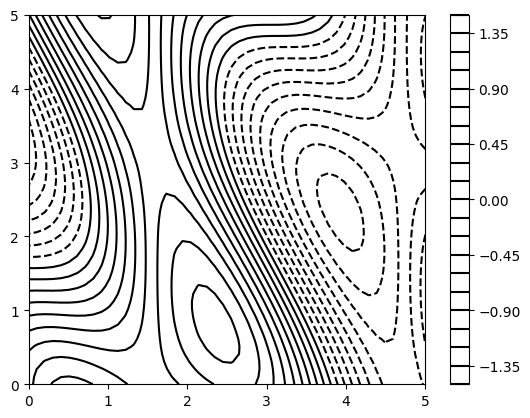

In [6]:
plt.contour(X, Y, Z, 20, colors='black') # idem avec couleur = noir 
# + 20 niveaux de précision d'affichage -> en tirets - - = négatifs, en tirets plein = positifs
plt.colorbar()

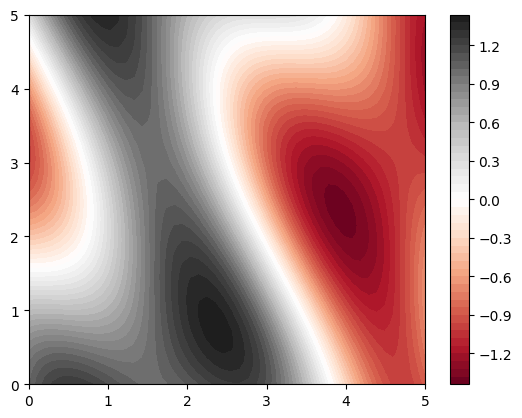

In [7]:
plt.contourf(X, Y, Z, 50, cmap='RdGy')  # contourf = fonct°contour map, coulormap = RdGy
plt.colorbar()  # barre de références couleurs

## 5. Imshow() = image show pour toutes les matrices ou images

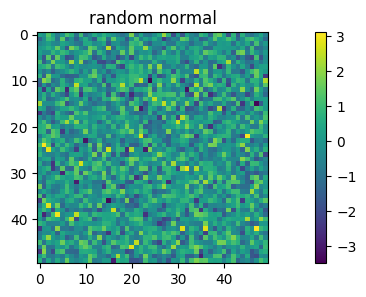

In [8]:
plt.figure(figsize=(12, 3))

# Simple graphique imshow()
X = np.random.randn(50, 50)

# plt.subplot(131) 1 ligne, 3 colonnes, 1 graph pas très utile ici
plt.imshow(X)
plt.title('random normal')
plt.colorbar()



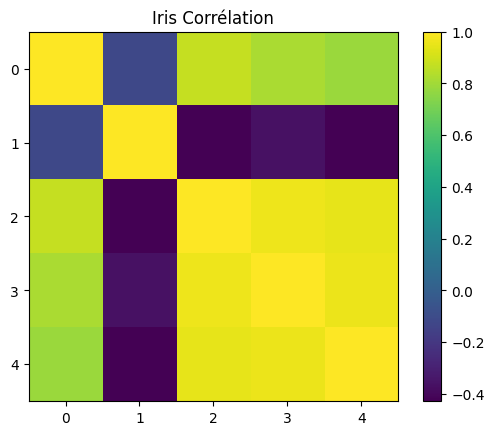

In [9]:
# Matrice de corrélation des iris
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

plt.imshow(np.corrcoef(X.T, y))  # image de la correlation entre la transposée de X (car on veut les colonnes de X et pas les lignes) et y
       
plt.title('Iris Corrélation')
plt.colorbar()


In [ ]:
# Indice 0 : Longueur du sépale (sepal length).
#Indice 1 : Largeur du sépale (sepal width).
#Indice 2 : Longueur du pétale (petal length).
#Indice 3 : Largeur du pétale (petal width).
#Indice 4 : La variable cible y (catégorie de l'espèce d'iris).

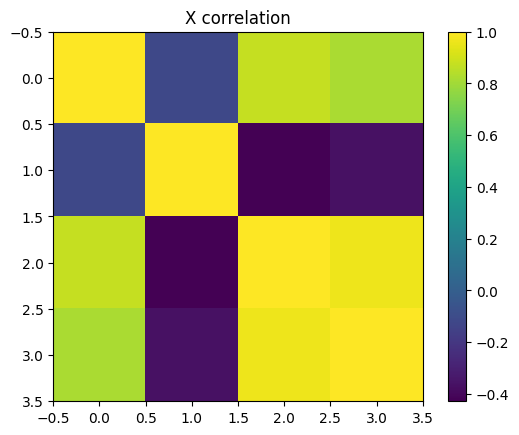

In [10]:
#plt.subplot(132)
plt.imshow(np.corrcoef(X.T))  # image de la correlation entre la transposée de X 
                                 # pour corrélation sur les colonnes de X = np.corrcoef(X.T) seulement
plt.title('X correlation')
plt.colorbar()

Text(0.5, 1.0, 'f(x, y) = sin(x) + cos(y)')

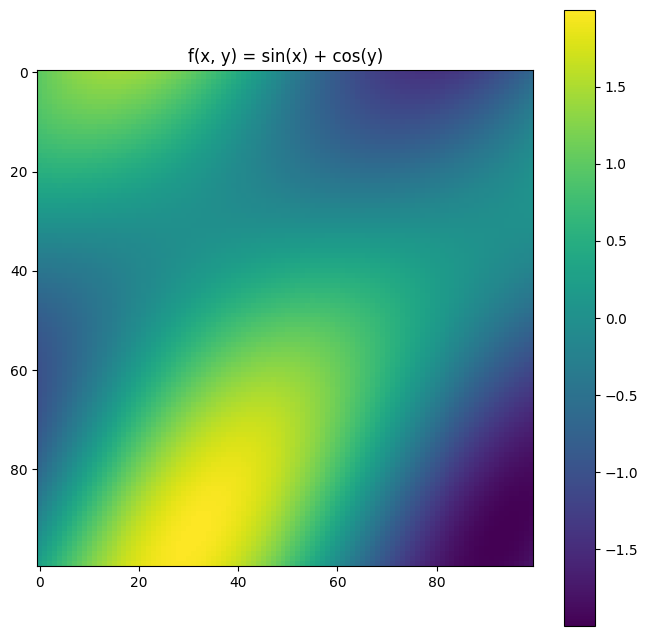

In [11]:
plt.figure(figsize=(8, 8))
# Matrice f(X, Y) = sin(X) + cos(Y)
X = np.linspace(0, 5, 100)
Y = np.linspace(0, 5, 100)
X, Y = np.meshgrid(X, Y)
f = lambda x, y: np.sin(x) + np.cos(x+y)

plt.imshow(f(X, Y))
plt.colorbar()
plt.title('f(x, y) = sin(x) + cos(y)')